In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('ggplot')
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\86176\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


### Data loading

In [5]:
df = pd.read_csv('D:/Denmark/work/project/GitHub/Reviews.csv')
df = df.head(500)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,500.000000,500.000000,500.00000,500.000000,5.000000e+02
mean,250.500000,0.952000,1.27600,4.316000,1.294820e+09
std,144.481833,2.045988,2.48922,1.202929,5.072437e+07
min,1.000000,0.000000,0.00000,1.000000,1.107821e+09
25%,125.750000,0.000000,0.00000,4.000000,1.267790e+09
50%,250.500000,0.000000,0.00000,5.000000,1.312978e+09
75%,375.250000,1.000000,2.00000,5.000000,1.334621e+09
max,500.000000,19.000000,19.00000,5.000000,1.351210e+09


### Review distibution visualization

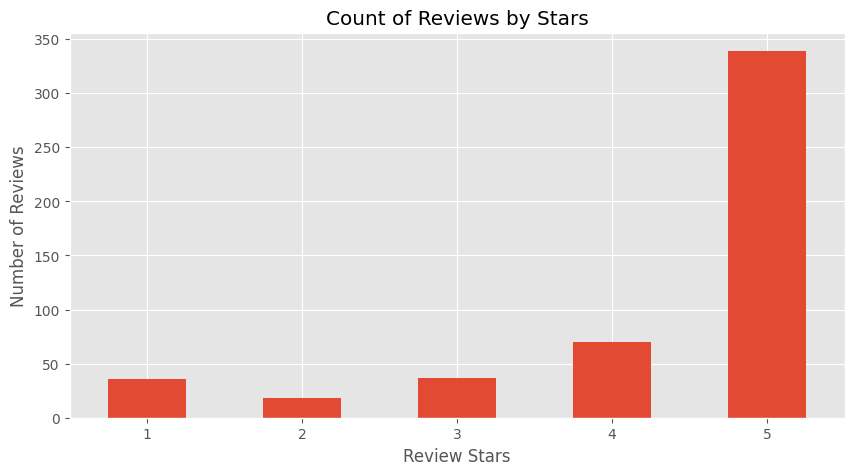

In [12]:
def plot_review_distribution(dataframe):
    ax = dataframe['Score'].value_counts().sort_index() \
        .plot(kind='bar', title='Count of Reviews by Stars', figsize=(10, 5))
    ax.set_xlabel('Review Stars')
    plt.xticks(rotation=0)
    ax.set_ylabel('Number of Reviews')
    plt.show()

plot_review_distribution(df)

### Initial text tokenization

In [16]:
example_review = df['Text'][50]

tokens = nltk.word_tokenize(example_review)
tagged_tokens = nltk.pos_tag(tokens)

entities = nltk.chunk.ne_chunk(tagged_tokens)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\86176/nltk_data'
    - 'c:\\Users\\86176\\torch\\nltk_data'
    - 'c:\\Users\\86176\\torch\\share\\nltk_data'
    - 'c:\\Users\\86176\\torch\\lib\\nltk_data'
    - 'C:\\Users\\86176\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
